In [1]:
 import pandas as pd
import numpy as np
raw_data = {'first_name': ['Jason', np.nan, 'Tina', 'Jake','Amy'],
'last_name': ['Miller', np.nan, 'Ali', 'Milner','Cooze'],
'age': [42, np.nan, 36, 24, 73],
'sex': ['m', np.nan, 'f', 'm', 'f'],
'preTestScore': [4, np.nan, np.nan, 2, 3],
'postTestScore': [25, np.nan, np.nan, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['first_name','last_name', 'age','sex', 'preTestScore', 'postTestScore'])
df 

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [2]:
df.isnull().sum()/len(df)

first_name       0.2
last_name        0.2
age              0.2
sex              0.2
preTestScore     0.4
postTestScore    0.4
dtype: float64

In [3]:
df.dropna()

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [4]:
df_no_missing = df.dropna()
df_no_missing

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [5]:
df_cleaned = df.dropna(how='all')
df_cleaned

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [6]:
df['location'] = np.nan
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [7]:
df.dropna(axis = 1, how='all') # location 삭제됨

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [8]:
df.dropna(axis = 0, thresh = 1) # 데이터가 한개라도 존재하는 행은 남김

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
2,Tina,Ali,36.0,f,NaN,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [9]:
df.dropna(thresh = 5)# 데이터가 다섯개 이상이 있는 행만 남김

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [10]:
df.fillna(0)

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,0.0
1,0,0,0.0,0,0.0,0.0,0.0
2,Tina,Ali,36.0,f,0.0,0.0,0.0
3,Jake,Milner,24.0,m,2.0,62.0,0.0
4,Amy,Cooze,73.0,f,3.0,70.0,0.0


In [11]:
df["preTestScore"].fillna(df["preTestScore"].mean(),inplace=True) # 열의 빈 값에만 채우기
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,Tina,Ali,36.0,f,3.0,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [12]:
df.groupby("sex")["postTestScore"].transform("mean") #성별에 따라 postTestScore 평균

0    43.5
1     NaN
2    70.0
3    43.5
4    70.0
Name: postTestScore, dtype: float64

In [13]:
df["postTestScore"].fillna(df.groupby("sex")["postTestScore"].transform("mean"),inplace = True)
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,Tina,Ali,36.0,f,3.0,70.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


## 원핫인코딩
범주형 데이터의 개수만큼 가변수를 생성해서 존재유무를 1 or 0으로 표현
=> 계산할 때 편함  

ex)color   

    {Green} = [1,0,0]
    {Blue} = [0,1,0]
    {Yellow} = [0,0,1]

In [14]:
edges = pd.DataFrame({'source':[0,1,2], 'target': [2,2,3], 'weight':[3,4,5], 'color':['red','blue','blue']})
edges

,source,target,weight,color
0,0,2,3,red
1,1,2,4,blue
2,2,3,5,blue


In [15]:
edges.dtypes

source     int64
target     int64
weight     int64
color     object
dtype: object

In [16]:
pd.get_dummies(edges) # get_dummies로 범주형 데이터 color에 가변수 추가

,source,target,weight,color_blue,color_red
0,0,2,3,0,1
1,1,2,4,1,0
2,2,3,5,1,0


In [17]:
pd.get_dummies(edges["color"]) # series 객체를 넣어서 가변수 추가

,blue,red
0,0,1
1,1,0
2,1,0


In [18]:
pd.get_dummies(edges[["color"]]) #dataframe(열) 객체 넣어서 가변수 추가

,color_blue,color_red
0,0,1
1,1,0
2,1,0


In [19]:
weight_dict = {3:"M", 4:"L", 5:"XL"}
#map(): series 에 적용(적용할 함수 or 매핑시킬 딕셔너리 같은 자료형 입력)
edges["weight_sign"] = edges["weight"].map(weight_dict) # 인덱스를 타고 값 선택하여 맵핑?
weight_sign = pd.get_dummies(edges["weight_sign"])
weight_sign

,L,M,XL
0,0,1,0
1,1,0,0
2,0,0,1


In [20]:
pd.concat([edges,weight_sign], axis = 1)

,source,target,weight,color,weight_sign,L,M,XL
0,0,2,3,red,M,0,1,0
1,1,2,4,blue,L,1,0,0
2,2,3,5,blue,XL,0,0,1


## 바인딩(binding)  
연속형 데이터를 범주형 데이터로 변환

In [21]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks','Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons',
'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts','Scouts'],
'company': ['1st', '1st', '2nd', '2nd', '1st',
'1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
'name': ['Miller', 'Jacobson', 'Ali', 'Milner','Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger','Riani', 'Ali'],
'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57,62, 70, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['regiment','company', 'name', 'preTestScore', 'postTestScore'])
df

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


In [22]:
bins = [0, 25, 50, 75, 100]
group_names = ['Low', 'Okay', 'Good', 'Great']
categories = pd.cut(df['postTestScore'], bins, labels=group_names)
categories

0       Low
1     Great
2      Good
3      Good
4      Good
5       Low
6     Great
7      Good
8      Good
9      Good
10     Good
11     Good
Name: postTestScore, dtype: category
Categories (4, object): ['Low' < 'Okay' < 'Good' < 'Great']

## 스케일링
데이터 간 범위 맞추기  
=> 변수 범위를 통일

## 최솟값-최댓값 정규화
최솟값과 최댓값을 기준으로 0 ~ 1까지로 값의 크기 변화

## z-스코어 정규화
기존 값을 표준 정규분포값으로 변환하여 처리

In [23]:
df = pd.DataFrame(
{'A':[14.00,90.20,90.95,96.27,91.21],
'B':[103.02,107.26,110.35,114.23,114.68],
'C':['big','small','big','small','small']})
df

,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.35,big
3,96.27,114.23,small
4,91.21,114.68,small


In [24]:
# 스케일링
( df["A"] - df["A"].min() ) / (df["A"].max() - df["A"].min())
# 브로드캐스팅으로(평균, 최대, 최소(스칼라)와 열(벡터) 계산

0    0.000000
1    0.926219
2    0.935335
3    1.000000
4    0.938495
Name: A, dtype: float64

In [25]:
# z- 스코어 정규화
( df["B"] - df["B"].mean() ) / (df["B"].std())

0   -1.405250
1   -0.540230
2    0.090174
3    0.881749
4    0.973556
Name: B, dtype: float64

# 실습

## 1. 데이터 확인

In [26]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
DATA_DIR = 'C:/Users/yttn0/Desktop/git/K-digit_campus/data/ch06'
os.listdir(DATA_DIR)

['test.csv', 'train.csv']

In [27]:
# test.csv과 test.csv를 가져온 후, 파일 순서 바꾸고 상대 경로 리스트 생성
data_files = sorted([os.path.join(DATA_DIR, filename)
for filename in os.listdir(DATA_DIR)], reverse=True)
data_files

['C:/Users/yttn0/Desktop/git/K-digit_campus/data/ch06\\train.csv',
 'C:/Users/yttn0/Desktop/git/K-digit_campus/data/ch06\\test.csv']

In [28]:
df_list = []
for filename in data_files:
    df_list.append(pd.read_csv(filename))
df = pd.concat(df_list, sort = False) # 두 데이터프레임 통합(위아래로)

df = df.reset_index(drop = True) # 인덱스 초기화

# df.head(5)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## 2. 데이터 열 확인하기
=> 원래는 train과 test 분리해서 처리하기(밑의 예제처럼 하면 안됨)

In [29]:
# (1) train.csv 데이터의 수
number_of_train_dataset = df.Survived.notnull().sum()
# (2) test.csv 데이터의 수
number_of_test_dataset = df.Survived.isnull().sum()
# (3) train.csv 데이터의 y 값 추출
y_true = df.pop("Survived")[:number_of_train_dataset]

In [32]:
print(y_true)

0     0.00
1     1.00
2     1.00
3     1.00
4     0.00
      ... 
886   0.00
887   1.00
888   0.00
889   1.00
890   0.00
Name: Survived, Length: 891, dtype: float64


## 데이터 노트 작성

ex) 나이 -> 생존여부에 영향 주는지 여부  
    티켓 가격 -> 티켓 가격과 pclass 관련  
    승선항구 -> 승선항구와 생존률 영향 여부?

In [30]:
df.head(2).T # transpose 함수로 데이터 모양확인

,0,1
PassengerId,1,2
Pclass,3,1
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th..."
Sex,male,female
Age,22.0,38.0
SibSp,1,1
Parch,0,0
Ticket,A/5 21171,PC 17599
Fare,7.25,71.2833
Cabin,NaN,C85


In [31]:
pd.options.display.float_format = '{:.2f}'.format

df.isnull().sum() / len(df) * 100 # 결측치 합을 데이터 개수로 나눠 비율 출력
#isnull() : bool형

PassengerId    0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age           20.09
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.08
Cabin         77.46
Embarked       0.15
dtype: float64

In [33]:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [34]:
df[df["Age"].notnull()].groupby(["Sex"])["Age"].mean()
#Age가 null이 아닌것들을 sex기준으로 묶어서 나이 평균

Sex
female   28.69
male     30.59
Name: Age, dtype: float64

In [35]:
df[df["Age"].notnull()].groupby(["Pclass"])["Age"].mean()

Pclass
1   39.16
2   29.51
3   24.82
Name: Age, dtype: float64

In [36]:
df["Age"].fillna(df.groupby("Pclass")["Age"].transform("mean"), inplace = True)
# Age가 비어있는 곳에 Pclass 기준으로 나눠서 나이의 평균계산
df.isnull().sum()/len(df)*100

PassengerId    0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.00
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.08
Cabin         77.46
Embarked       0.15
dtype: float64

In [37]:
df.loc[61,"Embarked"] = "S"
df.loc[829,"Embarked"] = "S"

## 원핫인코딩

In [38]:
df.info()# 열별로 데이터타입 확인 (열별로 문자열 리스트 타입으로 정리)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [39]:
# 데이터 타입 정리
object_columns = ["PassengerId", "Pclass", "Name","Sex", "Ticket", "Cabin", "Embarked"]
numeric_columns = ["Age", "SibSp", "Parch", "Fare"]
for col_name in object_columns:
    df[col_name] = df[col_name].astype(object)
for col_name in numeric_columns:
    df[col_name] = df[col_name].astype(float)
df["Parch"] = df["Parch"].astype(int)
df["SibSp"] = df["SibSp"].astype(int)


In [40]:
def merge_and_get(ldf, rdf, on, how = 'inner', index = None):
    if index is True: # 왼쪽 오른쪽 데이터 합치기
        return pd.merge(ldf, rdf, how = how, left_index = True, right_index = True)
    else:
        return pd.merge(ldf, rdf, how = how, on = on)

In [42]:
# get_dummies: 결측값을 제외하고 0과 1로 구성된 더미값이 만들기(원핫인코딩)
one_hot_df = merge_and_get(df, pd.get_dummies(df["Sex"], prefix = "Sex"), on = None, index = True)
one_hot_df = merge_and_get(one_hot_df, pd.get_dummies(df["Pclass"], prefix = "Pclass"), on = None, index = True)
one_hot_df.head()

C:\Users\yttn0\anaconda3\envs\ml\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,1,0,1,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,1,0,1,0,0
4,5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,0,1,0,0,1


In [44]:
one_hot_df = merge_and_get(one_hot_df, pd.get_dummies(df["Embarked"], prefix = "Embarked"), on = None, index = True)
one_hot_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C_x,Embarked_Q_x,Embarked_S_x,Embarked_C_y,Embarked_Q_y,Embarked_S_y
0,1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,...,1,0,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,...,0,1,0,0,1,0,0,1,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,...,0,0,0,1,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,...,0,1,0,0,0,0,1,0,0,1
4,5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,...,1,0,0,1,0,0,1,0,0,1


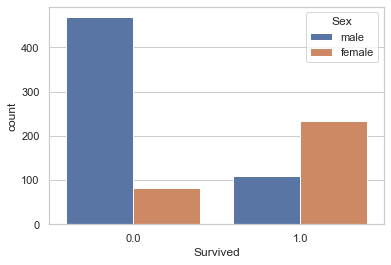

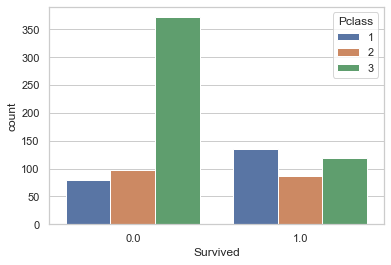

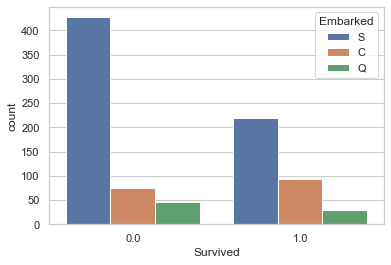

In [47]:
temp_columns = ["Sex","Pclass","Embarked"]
for col_name in temp_columns:
    temp_df = pd.merge(one_hot_df[col_name], y_true, left_index = True, right_index = True)
    sns.countplot(x = "Survived", hue = col_name, data = temp_df)
    plt.show()

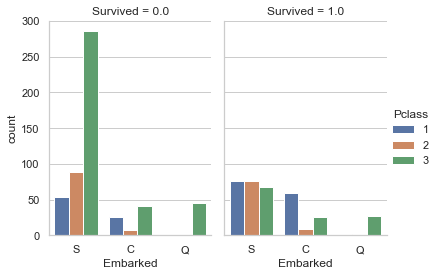

In [49]:
#범주형 데이터 간 상관관계 분석
In [16]: temp_df = pd.merge(one_hot_df[temp_columns], y_true, left_index=True,right_index=True)
g = sns.catplot(x="Embarked",hue="Pclass",col="Survived",data=temp_df,kind="count",height=4, aspect=.7);


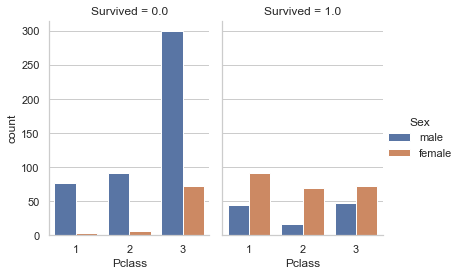

In [50]:
temp_df = pd.merge(one_hot_df[temp_columns],y_true, left_index=True,right_index=True)
g = sns.catplot(x="Pclass",hue="Sex", col="Survived",data=temp_df, kind="count",height=4, aspect=.7)

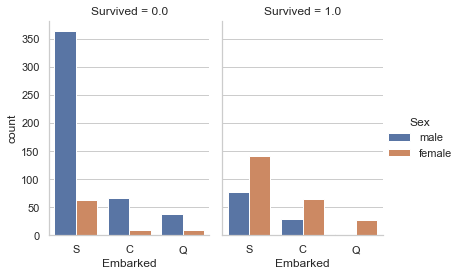

In [51]:
temp_df = pd.merge(one_hot_df[temp_columns],y_true, left_index=True,right_index=True)
g = sns.catplot(x="Embarked", hue="Sex",col="Survived",data=temp_df, kind="count",height=4, aspect=.7);


## Heatmap: 상관계수 데이터 확인

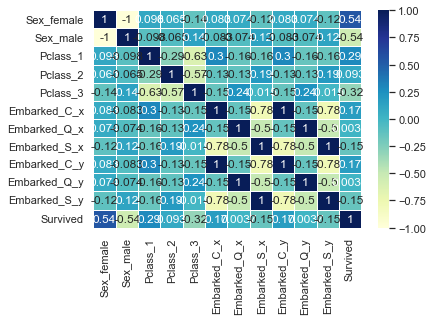

In [63]:
crosscheck_columns = [col_name for col_name in one_hot_df.columns.tolist() if col_name.split("_")[0] in temp_columns and "_" in
col_name ]
# temp 열
temp_df = pd.merge(one_hot_df[crosscheck_columns], y_true, left_index=True, right_index=True)
corr = temp_df.corr()
sns.set()
ax = sns.heatmap(corr, annot=True, linewidths=.5, cmap="YlGnBu")


In [61]:
print(corr)

              Sex_female  Sex_male  Pclass_1  Pclass_2  Pclass_3  \
Sex_female          1.00     -1.00      0.10      0.06     -0.14   
Sex_male           -1.00      1.00     -0.10     -0.06      0.14   
Pclass_1            0.10     -0.10      1.00     -0.29     -0.63   
Pclass_2            0.06     -0.06     -0.29      1.00     -0.57   
Pclass_3           -0.14      0.14     -0.63     -0.57      1.00   
Embarked_C_x        0.08     -0.08      0.30     -0.13     -0.15   
Embarked_Q_x        0.07     -0.07     -0.16     -0.13      0.24   
Embarked_S_x       -0.12      0.12     -0.16      0.19     -0.02   
Embarked_C_y        0.08     -0.08      0.30     -0.13     -0.15   
Embarked_Q_y        0.07     -0.07     -0.16     -0.13      0.24   
Embarked_S_y       -0.12      0.12     -0.16      0.19     -0.02   
Survived            0.54     -0.54      0.29      0.09     -0.32   

              Embarked_C_x  Embarked_Q_x  Embarked_S_x  Embarked_C_y  \
Sex_female            0.08          0.07   

In [ ]:
print